In [51]:
#Main resource consulted:
#http://codeaffectionate.blogspot.com/2013/05/fun-with-hopfield-and-numpy.html

import numpy as np
from pylab import imshow, cm, show
import matplotlib.pyplot as plt

Making some random data. Here I use three letters of my name.

In [52]:
S = """
.XXXX
X....
.XXX.
....X
XXXX.
"""
 
H = """
X...X
X...X
XXXXX
X...X
X...X
"""

O = """
.XXX.
X...X
X...X
X...X
.XXX.
"""

In [53]:
def to_pattern(letter):
    return np.array([+1 if c=='X' else -1 for c in letter.replace('\n','')])

def display(pattern):
    imshow(pattern.reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    show()

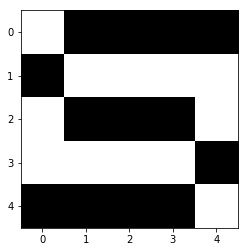

In [54]:
#example
display(to_pattern(S))

In [55]:
patterns = np.array([to_pattern(S), to_pattern(H), to_pattern(O)])

In [56]:
def train(patterns):
    row,col = patterns.shape
    W = np.zeros((col,col))
    for p in patterns:
        W = W + np.outer(p,p)
    W[np.diag_indices(col)] = 0
    return W/row

In [57]:
weights = train(patterns)

In [58]:
def recall(W, pattern, steps=5, verbose=False):
    sgn = np.vectorize(lambda x: -1 if x<0 else +1)
    
    for i in range(steps): 
        pattern = sgn(np.dot(pattern,W))
        if verbose == True:
            print(f"After iteration {i}:")
            display(pattern)
        
    return pattern

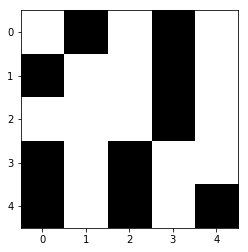

In [62]:
some_random_pattern = """
.X.X.
X..X.
...X.
X.X..
X.X.X
"""
display(to_pattern(some_random_pattern))

After iteration 0:


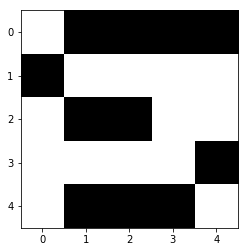

After iteration 1:


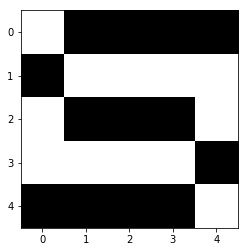

array([-1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1])

In [64]:
recall(weights,to_pattern(some_random_pattern),2,True)

After the second iteration we have already converged to S.

In [68]:
def generate_patterns(num, size):
    patterns = []
    for i in range(num):
        patterns.append(np.random.choice((-1,1),size=size))
    return patterns
    
def corrupt(pattern):
    bad = np.random.randint((np.shape(pattern)[1]))
    pattern[0][bad] = -pattern[0][bad]
    return (pattern)

def capacity(size):
    """
    Generates corrupted patterns, trains on the patterns and
    then tests if the network was able to correctly recall the
    corrupted pattern.
    """
    num = 1                   
    
    while True:
        patterns = generate_patterns(num, size)
        patterns = np.reshape(patterns, (num,size))

        corrupt_patterns = [p for p in corrupt(patterns)]
        corrupt_patterns = np.reshape(corrupt_patterns, (num,size))
        
        weights = train(patterns)
        recalled_patterns = recall(weights, corrupt_patterns)

        if np.any(np.not_equal(recalled_patterns,patterns)):
            break
        else:
            num +=1 
        
    return num

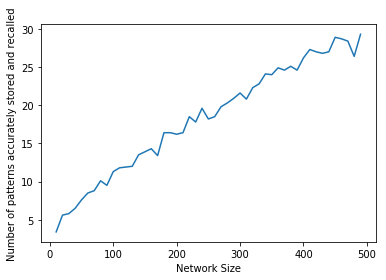

In [72]:
network_size = [x for x in range(10,500,10)]
patternbox = []


for size in network_size:
    cap = []
    for i in range(10): #per size average over 10 samples
        cap.append(capacity(size))
    avcap = np.average(cap)
    patternbox.append(avcap)

plt.plot(netw_size, patternbox)
plt.xlabel("Network Size")
plt.ylabel("Number of patterns accurately stored and recalled")
plt.show()

We see that the number of patterns stored and recalled are roughly proportional to the network size. 